In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


In [8]:
# Load your trained model
model = load_model('/Users/dheemankumar/github/pc-clener/resnet50_model.h5')


In [3]:
# Define a function to load and preprocess an image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, (224, 224))  # Resize to match input size of your model
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image


In [4]:
# Define a function to predict the label of an image
def predict_image_label(image_path):
    image = preprocess_image(image_path)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    prediction = model.predict(image,verbose=0)
    predicted_class = np.argmax(prediction)
    return predicted_class


In [9]:
# Define your image path
image_path = '/Users/dheemankumar/github/pc-clener/catagories/train/docks/Adobe Scan 21 Nov 2021 (3)_1.jpg'


In [10]:
# Predict the label of the image
predicted_label = predict_image_label(image_path)

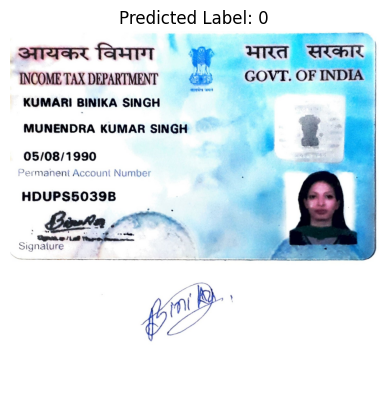

In [11]:
# Display the image along with its predicted label
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.title(f'Predicted Label: {predicted_label}')
plt.show()
